In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%env OPENAI_API_KEY= "fake_openai_key"

from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt

env: OPENAI_API_KEY="fake_openai_key"


/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
from engine.step_interpreters import parse_step

str_ = "BOX1=LOC(image=IMAGE,object='lamp')"
dict_ = parse_step(str_, partial=False)
eval(dict_['args']['object'])

'lamp'

In [8]:
interpreter = ProgramInterpreter(dataset='gqa')

Registering LOC step
Registering COUNT step
Registering CROP step
Registering CROP_RIGHTOF step
Registering CROP_LEFTOF step
Registering CROP_FRONTOF step
Registering CROP_INFRONTOF step
Registering CROP_INFRONT step
Registering CROP_BEHIND step
Registering CROP_AHEAD step
Registering CROP_BELOW step
Registering CROP_ABOVE step
Registering VQA step
Registering EVAL step
Registering RESULT step


In [9]:
prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter, debug=True)

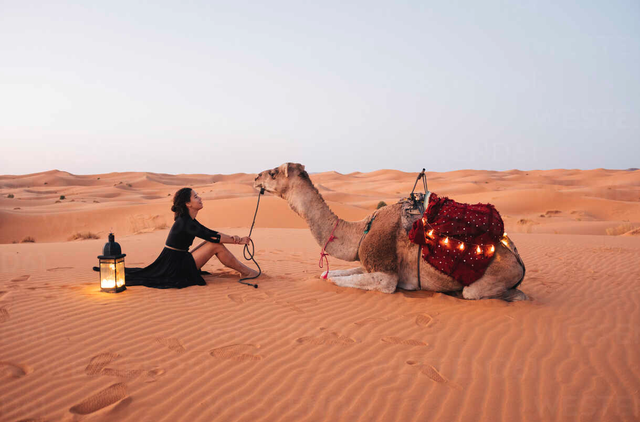

In [4]:
image = Image.open('../assets/camel1.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [5]:
#correct output by GPT
answer = """BOX0=LOC(image=IMAGE,object='people')
BOX1=LOC(image=IMAGE,object='lamp')
ANSWER0=COUNT(box=BOX0)
ANSWER1=COUNT(box=BOX1)
ANSWER2=EVAL(expr="{ANSWER0} + {ANSWER1}")
FINAL_RESULT=RESULT(var=ANSWER2)"""

answer2 = """BOX0=LOC(image=IMAGE, object='woman')
IMAGE0=CROP(image=IMAGE, box=BOX0)
BOX1=LOC(image=IMAGE0, object='dress')
ANSWER0=VQA(image=IMAGE0, question='What color is the dress?')
FINAL_RESULT=RESULT(var=PROVA0)
"""

prova = """PROVA0=PROVA(image=IMAGE)
"""

In [10]:
# question = "How many people or animals are in the image?"
# question = "Are there more animals than people in the image?"
question = "Localize the woman and tell me the color of her dress."
# question = "Find and tell me the name of the animal in the image."
# question = "How many women are to the right of the camel?"
# question = "How many women are to the left of the camel?"
# question = "Is the lamp to the left of the woman lit?"
# question = "Is there a sun in the sky?"
prog,_ = generator.generate(dict(question=question), answer) #fake answer
print(prog)

BOX0=LOC(image=IMAGE,object='people')
BOX1=LOC(image=IMAGE,object='lamp')
ANSWER0=COUNT(box=BOX0)
ANSWER1=COUNT(box=BOX1)
ANSWER2=EVAL(expr="{ANSWER0} + {ANSWER1}")
FINAL_RESULT=RESULT(var=ANSWER2)


In [11]:
result, prog_state, html_str = interpreter.execute(prog,\
                                                   init_state,\
                                                    inspect=True)
result

LOC


LOC
COUNT
COUNT
EVAL
var_name: IMAGE
var_value: <PIL.Image.Image image mode=RGB size=640x422 at 0x7F82D9CE2500>
var_name: BOX0
var_value: [[100, 186, 258, 287]]
var_name: BOX0_IMAGE
var_value: <PIL.Image.Image image mode=RGB size=640x422 at 0x7F82D8167EE0>
var_name: BOX1
var_value: [[93, 233, 128, 295]]
var_name: BOX1_IMAGE
var_value: <PIL.Image.Image image mode=RGB size=640x422 at 0x7F8306F61FC0>
var_name: ANSWER0
var_value: 1
var_name: ANSWER1
var_value: 1
1 + 1
2
RESULT


2

In [ ]:
if eval('1'):
    print(True)

True



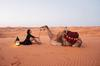
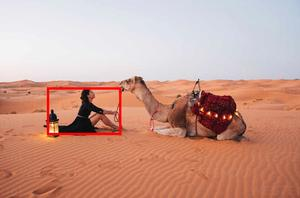
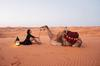
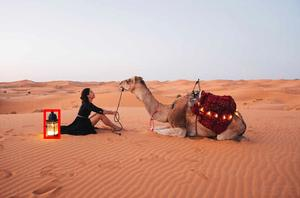
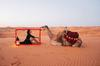
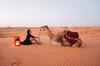

In [12]:
HTML(html_str)